In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("TV Sales.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
df.duplicated().sum()

0

No Any Null And Duplicate Data Present.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
descreat_features=[feature for feature in df.columns if len(df[feature].unique())<25]

In [8]:
descreat_features

[]

Biveriant Analysis

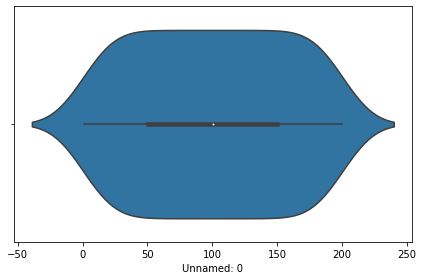

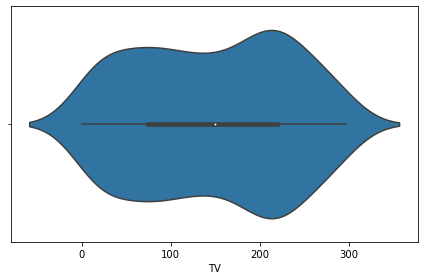

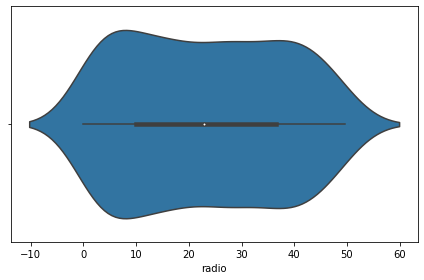

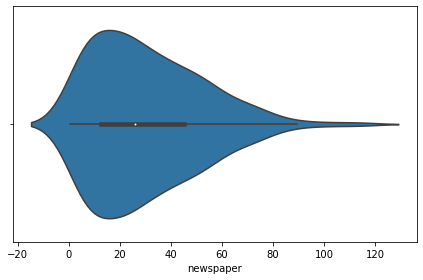

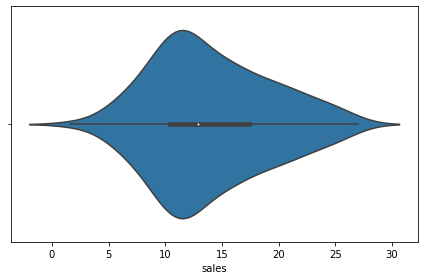

In [9]:
for i in df.columns:
    plt.figure()
    sns.violinplot(df[i])
    plt.tight_layout()
    

Violin chart show the density of the Data and from that we can say that TV having more density as compair to Newspaper and radio.

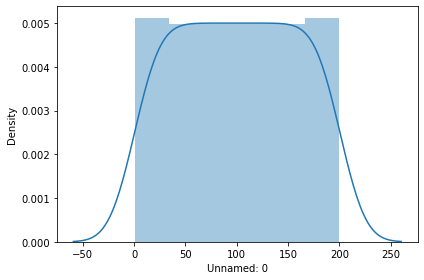

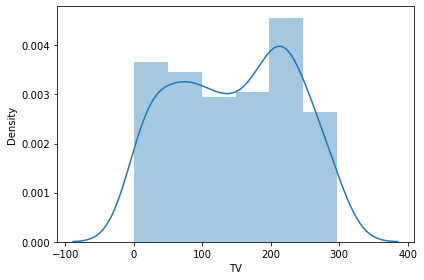

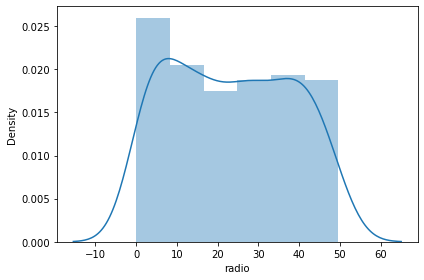

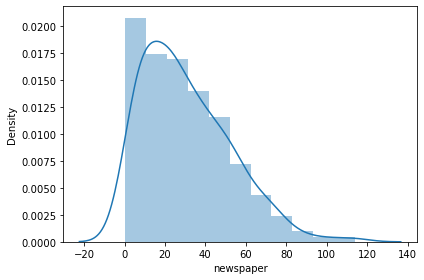

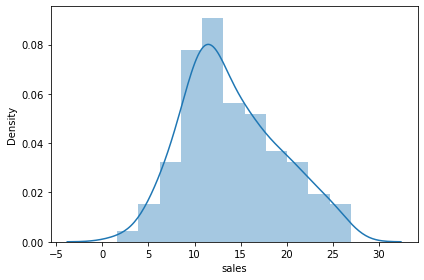

In [10]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],kde=True)
    plt.tight_layout()

This shows newspaper having right skew.

Uni Verian Analysis

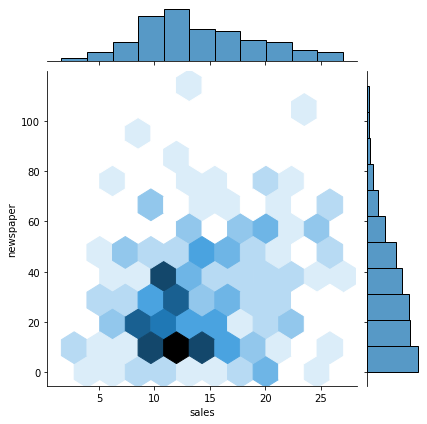

In [11]:
sns.jointplot(x='sales',y='newspaper',data=df,kind='hex')

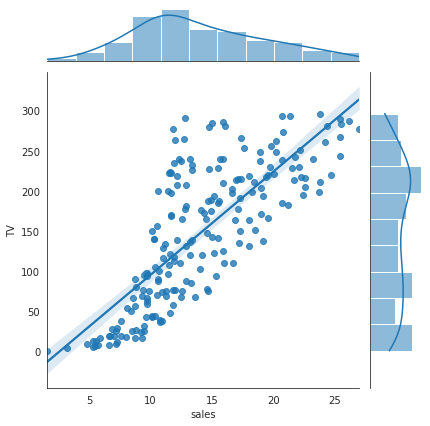

In [12]:
with sns.axes_style('white'):
    sns.jointplot(x='sales',y='TV',data=df,kind='reg')

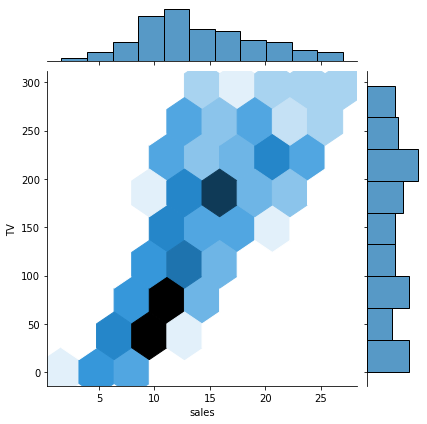

In [13]:
sns.jointplot(x='sales',y='TV',data=df,kind='hex')

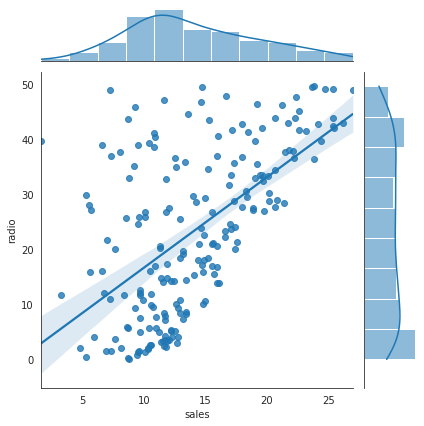

In [14]:
with sns.axes_style('white'):
    sns.jointplot(x='sales',y='radio',data=df,kind='reg')

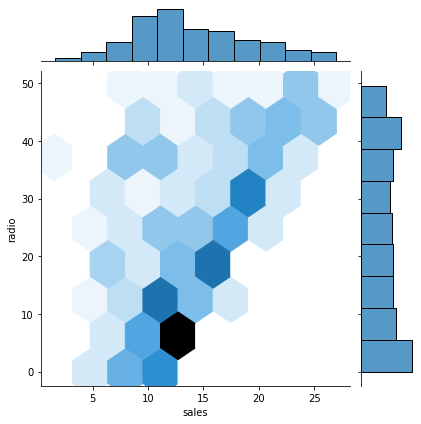

In [15]:
sns.jointplot(x='sales',y='radio',data=df,kind='hex')

From above three chart we can say that as the radio,TV and newpaper marketing increases sales increases no any negative relation with sales.

Also Tv Having High Sales

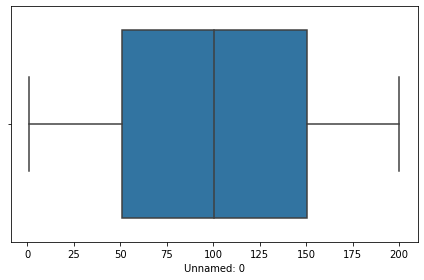

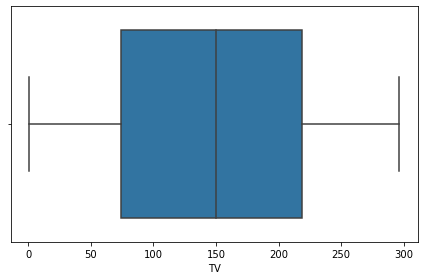

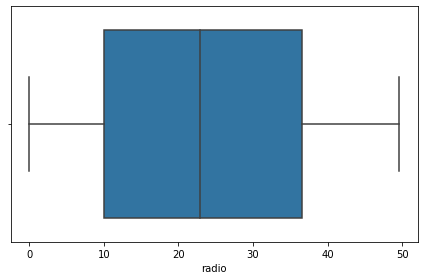

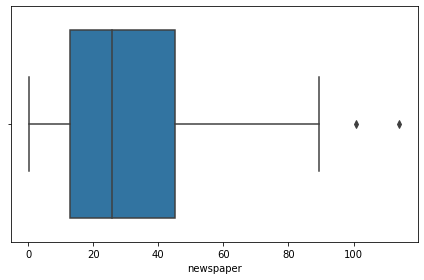

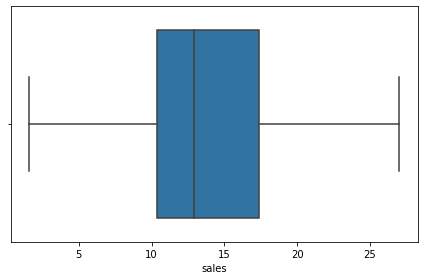

In [19]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.tight_layout()

# Statastical Analysis

In [20]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


we can say that outliers are present and data is skewed.

In [21]:
corr=df.corr()
corr

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

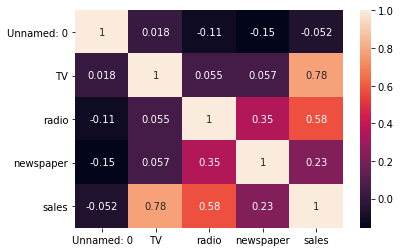

In [22]:
sns.heatmap(data=corr,annot=True)

From this relation chart we can say that TV having high co relation with Sales and newspaper having less.& also see that there is no much multi colinearity in this dataset.

# Data Cleaning

In [23]:
df.shape

(200, 5)

In [24]:
from scipy.stats import zscore

In [25]:
z=np.abs(zscore(df))

In [26]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [27]:
df_new=df[(z<3).all(axis=1)]

In [28]:
df_new.shape

(198, 5)

In [29]:
loss_of_data=(200-198)*100/200

In [30]:
loss_of_data

1.0

Only 1% data is lossed during outliers removed

Skewness

In [31]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

we consider range -0.5 to +0.5 so newspaper and sales having skewness.

In [32]:
df['newspaper']=np.sqrt(df['newspaper'])

In [33]:
df['sales']=np.sqrt(df['sales'])

In [34]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [35]:
x=df.drop(['sales','Unnamed: 0'],axis=1)

In [36]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [37]:
y=df['sales']
y

0      4.701064
1      3.224903
2      3.049590
3      4.301163
4      3.591657
         ...   
195    2.756810
196    3.114482
197    3.577709
198    5.049752
199    3.660601
Name: sales, Length: 200, dtype: float64

Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std=StandardScaler()

In [40]:
X=std.fit_transform(x)

In [41]:
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.56309461e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.74855194e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.56604912e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.23357596e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.23036007e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.73106889e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.43678801e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.52652825e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.03568892e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.63332869e-01],
       [-9.45155670e-01, -1.17923146e+00, -1.08436840e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.54396138e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.46436938e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.20797302e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.07641928e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04903522e+00],
       [-9.25304978e-01,  9.00494200e-01

In [42]:
x=X

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
ln=LinearRegression()

In [45]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    if round(ln.score(x_train,y_train)*100,2)==round(ln.score(x_test,y_test)*100,2):
        print('At random state',i,'score is best')
        print('Train score',ln.score(x_train,y_train)*100)
        print('Test Score',ln.score(x_test,y_test))

At random state 108 score is best
Train score 87.56683044426154
Test Score 0.8757074778028171
At random state 255 score is best
Train score 87.6265650039685
Test Score 0.876317508938088


From this we get random state=255 best score.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=255)

In [47]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)

Train Score 87.6265650039685


In [48]:
print('Error')
print('Mean Absoluate Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Room Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Error
Mean Absoluate Error 0.18039480877725148
Mean Squared Error 0.05472047897186718
Room Mean Squared Error 0.23392408805393938
R2 Score 87.6317508938088


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [50]:
dtc=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
kn=KNeighborsRegressor(n_neighbors=5)

In [51]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [52]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Taining Score:-',dtc.score(x_train,y_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,preddtc))
print('Mean Squared Error',mean_squared_error(y_test,preddtc))
print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,preddtc)))
print('R2 Score',r2_score(y_test,preddtc)*100)

Taining Score:- 100.0
Mean Absolute Error 0.1489153826278468
Mean Squared Error 0.05171992540417721
Root Mean Squared Erro 0.2274201517108306
R2 Score 88.30995391174547


In [53]:
fun(svr)

Taining Score:- 95.09368279461125
Mean Absolute Error 0.09249141809949245
Mean Squared Error 0.021179487691953068
Root Mean Squared Erro 0.1455317411836781
R2 Score 95.21288584023065


In [54]:
fun(svrl)

Taining Score:- 86.12425724754102
Mean Absolute Error 0.1849829218650387
Mean Squared Error 0.0766841064353638
Root Mean Squared Erro 0.27691895282801393
R2 Score 82.66740078488944


In [55]:
fun(svrp)

Taining Score:- 81.20086368802349
Mean Absolute Error 0.1967906333714503
Mean Squared Error 0.06338222394464525
Root Mean Squared Erro 0.2517582648983847
R2 Score 85.67397162121331


In [56]:
fun(kn)

Taining Score:- 91.91662071713871
Mean Absolute Error 0.1082138863609953
Mean Squared Error 0.01929191547284429
Root Mean Squared Erro 0.13889533999686343
R2 Score 95.63952617398698


# Ensemble Method

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rd=RandomForestRegressor()

In [59]:
fun(rd)

Taining Score:- 99.56943775083718
Mean Absolute Error 0.10448660899894616
Mean Squared Error 0.0173223709090765
Root Mean Squared Erro 0.1316144783413911
R2 Score 96.08469438611006


In [60]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [61]:
fun(ad)

Taining Score:- 97.23152732094943
Mean Absolute Error 0.16607733047822504
Mean Squared Error 0.04522496027093293
Root Mean Squared Erro 0.21266160977226928
R2 Score 89.77798467853191


In [62]:
paramad={'n_estimators':[50,100,150,10,125,250,500],'learning_rate':[1,10,100,50,150,250,500,0.01],'random_state':[0,10,50,100,108]}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
gdad=GridSearchCV(ad,paramad)
gdad.fit(x,y)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1, 10, 100, 50, 150, 250, 500, 0.01],
                         'n_estimators': [50, 100, 150, 10, 125, 250, 500],
                         'random_state': [0, 10, 50, 100, 108]})

In [65]:
print(gdad.best_score_)
print(gdad.best_params_)

0.9463320937106564
{'learning_rate': 1, 'n_estimators': 500, 'random_state': 0}


In [66]:
ad1=AdaBoostRegressor(n_estimators=500,learning_rate=1,random_state=0)

In [67]:
fun(ad1)

Taining Score:- 97.90256319057731
Mean Absolute Error 0.12830461816222333
Mean Squared Error 0.02962662995174816
Root Mean Squared Erro 0.17212387966737258
R2 Score 93.3036123530908


After Applying Hyper Tuning (GridSearchCV)method score is improved in AdaBoostRegressor.

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
gd=GradientBoostingRegressor()

In [70]:
fun(gd)

Taining Score:- 99.89025771324862
Mean Absolute Error 0.09402434234838736
Mean Squared Error 0.013615654833564663
Root Mean Squared Erro 0.11668613813801819
R2 Score 96.92250846685712


# Regurization & Hyper Tuning

In [71]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [72]:
ls=Lasso()

In [73]:
param1={'normalize':['True','False'],'alpha':[1.0,0.1,0.001,0.0001,0.00001],'max_iter':[10,100,1000],'selection':['cyclic','random'],'copy_X':['True','False']}

In [74]:
gd=GridSearchCV(ls,param1)
gd.fit(x,y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001, 1e-05],
                         'copy_X': ['True', 'False'],
                         'max_iter': [10, 100, 1000],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [75]:
print(gd.best_score_)
print(gd.best_params_)

0.8715144607716694
{'alpha': 0.001, 'copy_X': 'True', 'max_iter': 1000, 'normalize': 'True', 'selection': 'random'}


In [76]:
ls1=Lasso(alpha=0.001,copy_X=True,max_iter=10,normalize=True,selection='random')

In [77]:
rd=Ridge()

In [78]:
param2={'alpha':[10,1,0.1,0.01,0.001,0.0001],'normalize':['True','False'],'copy_X':['Ture','False'],'max_iter':[10,100,1000],'solver':['auto','svd','cholesky','isqr','sparse_cg','sag','saga']}

In [79]:
gd2=GridSearchCV(rd,param2)
gd2.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'copy_X': ['Ture', 'False'],
                         'max_iter': [10, 100, 1000],
                         'normalize': ['True', 'False'],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr',
                                    'sparse_cg', 'sag', 'saga']})

In [80]:
print(gd2.best_score_)
print(gd2.best_params_)

0.8744153975074328
{'alpha': 0.001, 'copy_X': 'Ture', 'max_iter': 10, 'normalize': 'True', 'solver': 'sag'}


In [81]:
rd1=Ridge(alpha=0.001,copy_X=False,max_iter=10,normalize=False,solver='sag')

In [82]:
es=ElasticNet()

In [83]:
param3={'alpha':[1,10,100,0.01,0.001,0.0001],'max_iter':[10,50,250,500,1000],'selection':['cyclic','random'],'normalize':['True','False']}

In [84]:
gd3=GridSearchCV(es,param3)
gd3.fit(x,y)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 10, 100, 0.01, 0.001, 0.0001],
                         'max_iter': [10, 50, 250, 500, 1000],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [85]:
print(gd3.best_score_)
print(gd3.best_params_)

0.8698127676519658
{'alpha': 0.0001, 'max_iter': 500, 'normalize': 'True', 'selection': 'random'}


In [86]:
es1=ElasticNet(alpha=0.0001,max_iter=500,normalize=True,selection='random')

In [87]:
fun(ls1)

Taining Score:- 87.5539866621599
Mean Absolute Error 0.1827565847025131
Mean Squared Error 0.05622888172256639
Root Mean Squared Erro 0.23712629909515812
R2 Score 87.29081270533455


In [88]:
fun(rd1)

Taining Score:- 87.51938604590521
Mean Absolute Error 0.1846529569079674
Mean Squared Error 0.05758399811446698
Root Mean Squared Erro 0.23996666042279077
R2 Score 86.98452121414482


In [89]:
fun(es1)
predes=es1.predict(x_test)

Taining Score:- 87.62023805998425
Mean Absolute Error 0.17894662123891386
Mean Squared Error 0.05531161022043616
Root Mean Squared Erro 0.2351842048702169
R2 Score 87.49813988246305


# Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
for i in range(2,11):
    crs_score=cross_val_score(ln,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 87.01277306239759
CV Value 3
Score 87.20153683694937
CV Value 4
Score 87.1966680070326
CV Value 5
Score 86.94817933814767
CV Value 6
Score 87.45635527576346
CV Value 7
Score 86.96217970872651
CV Value 8
Score 86.66261594427291
CV Value 9
Score 86.7123156033331
CV Value 10
Score 87.06475793182864


In [92]:
for i in range(2,11):
    crs_score=cross_val_score(svr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 92.32424060523827
CV Value 3
Score 93.07667480303941
CV Value 4
Score 94.08376260475282
CV Value 5
Score 94.37667800915645
CV Value 6
Score 94.4434895558361
CV Value 7
Score 94.10034194645763
CV Value 8
Score 94.13092019312563
CV Value 9
Score 94.15280468714771
CV Value 10
Score 94.77653683919975


In [93]:
for i in range(2,11):
    crs_score=cross_val_score(svrl,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 86.00235775826604
CV Value 3
Score 86.31325312795197
CV Value 4
Score 86.3580365353334
CV Value 5
Score 86.66844495486308
CV Value 6
Score 86.3627054809473
CV Value 7
Score 86.05513122740834
CV Value 8
Score 85.98120114629127
CV Value 9
Score 85.8006263819678
CV Value 10
Score 86.81747088772845


In [94]:
for i in range(2,11):
    crs_score=cross_val_score(svrp,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 76.22404565493413
CV Value 3
Score 79.27798829457791
CV Value 4
Score 77.19255982204747
CV Value 5
Score 78.39908328223308
CV Value 6
Score 78.79857880081039
CV Value 7
Score 76.9462641804157
CV Value 8
Score 73.60773693789045
CV Value 9
Score 74.74769644527635
CV Value 10
Score 76.36756207661915


In [95]:
for i in range(2,11):
    crs_score=cross_val_score(dtc,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 90.00808128177916
CV Value 3
Score 94.15160360321583
CV Value 4
Score 94.49864142104357
CV Value 5
Score 92.3403534394476
CV Value 6
Score 93.99516274346654
CV Value 7
Score 93.8306686411722
CV Value 8
Score 93.958774241396
CV Value 9
Score 93.0749417753995
CV Value 10
Score 94.25275988561387


In [96]:
for i in range(2,11):
    crs_score=cross_val_score(kn,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 89.00398416399116
CV Value 3
Score 87.41707253014395
CV Value 4
Score 90.78748470632797
CV Value 5
Score 90.99382544984151
CV Value 6
Score 90.01453105370736
CV Value 7
Score 90.7712267774967
CV Value 8
Score 90.57128701300566
CV Value 9
Score 90.03355073886625
CV Value 10
Score 91.86946904135294


In [97]:
for i in range(2,11):
    crs_score=cross_val_score(rd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 87.00259880770165
CV Value 3
Score 87.20359460251642
CV Value 4
Score 87.20067669154756
CV Value 5
Score 86.96285524833236
CV Value 6
Score 87.45519338821701
CV Value 7
Score 86.96609068699041
CV Value 8
Score 86.6794985659034
CV Value 9
Score 86.7296489458147
CV Value 10
Score 87.08384126952538


In [98]:
for i in range(2,11):
    crs_score=cross_val_score(ad,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 93.81357591983122
CV Value 3
Score 94.53234154255199
CV Value 4
Score 94.51005149780977
CV Value 5
Score 94.11581743746126
CV Value 6
Score 94.56627762427034
CV Value 7
Score 94.10294412697723
CV Value 8
Score 94.02738726988962
CV Value 9
Score 93.4551103234277
CV Value 10
Score 94.66400291518502


In [99]:
for i in range(2,11):
    crs_score=cross_val_score(gd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 87.06056388433691
CV Value 3
Score 87.21725500936722
CV Value 4
Score 87.18470252614128
CV Value 5
Score 87.03159486517116
CV Value 6
Score 87.3970371847525
CV Value 7
Score 86.9259649451821
CV Value 8
Score 86.68509441047956
CV Value 9
Score 86.77935041689109
CV Value 10
Score 87.15722434950972


In [100]:
for i in range(2,11):
    crs_score=cross_val_score(ls1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 87.08627476917479
CV Value 3
Score 87.24881729022447
CV Value 4
Score 87.23533830506744
CV Value 5
Score 87.15085644359775
CV Value 6
Score 87.43890455244174
CV Value 7
Score 87.01713814624297
CV Value 8
Score 86.81809638603009
CV Value 9
Score 86.79435896287202
CV Value 10
Score 87.14397785725438


In [101]:
for i in range(2,11):
    crs_score=cross_val_score(rd1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 86.78165185945771
CV Value 3
Score 87.18954631802872
CV Value 4
Score 87.10103826528535
CV Value 5
Score 86.40444962279253
CV Value 6
Score 87.36621294966822
CV Value 7
Score 86.90225685522151
CV Value 8
Score 86.74784249940377
CV Value 9
Score 86.54812412413507
CV Value 10
Score 86.61776730458402


In [102]:
for i in range(2,11):
    crs_score=cross_val_score(es1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 87.01843468101515
CV Value 3
Score 87.21014962711008
CV Value 4
Score 87.20742353866606
CV Value 5
Score 86.9781201193258
CV Value 6
Score 87.4569549223802
CV Value 7
Score 86.97426931587114
CV Value 8
Score 86.6933789858459
CV Value 9
Score 86.74157626439253
CV Value 10
Score 87.10044603068503


In [103]:
df=pd.DataFrame()

In [104]:
df['Model Name']=['DTC','SVR','SVRL','SVRP','KNN','RD','AD','GD','LS','RID','ES','LN']
df['RMSE']=[0.14,0.14,0.27,0.25,0.13,0.12,0.17,0.11,0.23,0.23,0.23,0.23]
df['R2_Score']=[95.21,95.21,82.66,85.67,95.63,96.46,93.30,97.00,87.29,87.46,87.49,87.63]
df['CV Score']=[94.87,94.77,86.81,79.27,91.86,87.45,94.79,87.21,87.43,87.38,87.45,87.20]
df['Differance']=df['R2_Score']-df['CV Score']

In [105]:
df

,Model Name,RMSE,R2_Score,CV Score,Differance
0,DTC,0.14,95.21,94.87,0.34
1,SVR,0.14,95.21,94.77,0.44
2,SVRL,0.27,82.66,86.81,-4.15
3,SVRP,0.25,85.67,79.27,6.40
4,KNN,0.13,95.63,91.86,3.77
5,RD,0.12,96.46,87.45,9.01
6,AD,0.17,93.30,94.79,-1.49
7,GD,0.11,97.00,87.21,9.79
8,LS,0.23,87.29,87.43,-0.14
9,RID,0.23,87.46,87.38,0.08


# Model Saving

From the above result table DTC perform well & less error.

In [106]:
import pickle
filename='Advertising_Sales_chanel_prediction.pkl'
pickle.dump(dtc,open(filename,'wb'))

       Actual   Predict
164  3.449638  3.521363
59   4.289522  4.123106
172  2.756810  2.645751
78   2.302173  1.264911
84   4.658326  4.753946
132  2.387467  2.645751
151  3.405877  3.316625
114  3.820995  3.687818
19   3.820995  4.159327
131  3.563706  3.449638
63   3.741657  3.435113
116  3.492850  3.521363
0    4.701064  4.711688
115  3.549648  3.535534
112  3.754997  3.794733
27   3.987480  3.962323
147  5.039841  4.969909
38   3.178050  3.098387
195  2.756810  2.846050
196  3.114482  3.114482
2    3.049590  2.683282
37   3.834058  3.911521
23   3.937004  3.860052
92   4.404543  4.438468
64   4.242641  4.381780
88   3.591657  3.435113
4    3.591657  3.872983
199  3.660601  3.591657
161  3.646917  3.535534
53   4.604346  4.732864
67   3.660601  3.521363
141  4.381780  4.301163
56   2.345208  2.569047
166  2.828427  2.701851
194  4.159327  4.242641
20   4.242641  4.427189
34   3.082207  3.098387
139  4.549725  4.753946
12   3.033150  2.683282
86   3.464102  3.435113


Text(0.5, 1.0, 'Regressor Line')

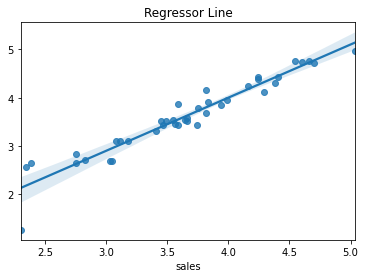

In [107]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=preddtc

res

print(res)
sns.regplot(y_test,preddtc)
plt.title('Regressor Line')